In [162]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## --------------------------------Importation des données------------------------

In [163]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [164]:
#Création de la dataframe avec le dataset 'titanic'
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [165]:
#Signification des variables : 
# - SibSp : Nombre de frères et sœurs/conjoints à bord du Titanic. Cela indique la taille de la famille à bord.
# -Parch : Nombre de parents/enfants à bord du Titanic. Cela indique aussi la taille de la famille à bord.
# -Fare : Tarif payé pour le billet (en livres sterling).
# -Embarked : Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).


In [166]:
dfCleaned = df.drop(['alive', 'who', 'embarked', 'class', 'deck'], axis = 1) #axis=1 car suppression de colonnes
dfCleaned

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,True,Cherbourg,True


## --------------------------------Visualisation/Nettoyage des données-----------------


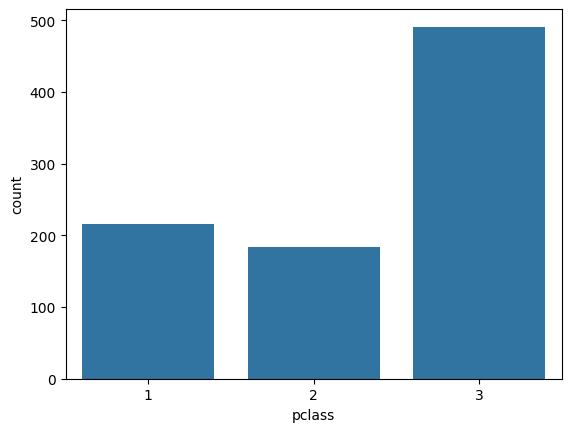

In [167]:
sns.countplot(x = 'pclass', data=dfCleaned);

In [168]:
dfCleaned.isna().sum() #On s'apercoit qu'il manque des valeurs d'ages de embark_town

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

In [169]:
#Rajout des valeurs manquantes tels que l'age avec la valeur médiane
dfCleaned.fillna(value={'age':dfCleaned['age'].median()}, inplace=True)
dfCleaned.fillna(value={'embark_town':'Southampton'}, inplace=True)

In [170]:
# valeur < Q1 - 1,5*IQR ou valeur > Q3 + 1,5*IQR

def finding_outliers(data, variable_name):
  iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
  lower = data[variable_name].quantile(0.25) - 1.5 * iqr
  upper = data[variable_name].quantile(0.75) + 1.5 * iqr 
  return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

#Pour la colonne Fare : 
iqr_fare = dfCleaned['fare'].quantile(0.75) - dfCleaned['fare'].quantile(0.25)
dfCleaned['fare'].quantile(0.75) + 1.5* iqr_fare

dfCleaned.loc[(finding_outliers(dfCleaned, 'fare').index, 'fare')] = dfCleaned['fare'].quantile(0.75) + 1.5 * iqr_fare

#Pour la colonne Age : 
dfCleaned.loc[dfCleaned['age'] < dfCleaned['age'].quantile(0.25) - 1.5 * (dfCleaned['age'].quantile(0.75) - dfCleaned['age'].quantile(0.25)), 
       'age'] = dfCleaned['age'].quantile(0.25) - 1.5 * (dfCleaned['age'].quantile(0.75) - dfCleaned['age'].quantile(0.25))

dfCleaned.loc[dfCleaned['age'] > dfCleaned['age'].quantile(0.75) + 1.5 * (dfCleaned['age'].quantile(0.75) - dfCleaned['age'].quantile(0.25)), 
       'age'] = dfCleaned['age'].quantile(0.55) + 1.5 * (dfCleaned['age'].quantile(0.75) - dfCleaned['age'].quantile(0.25))

## ---------------------Visualisation/Nettoyage des données--------


In [171]:
dfCleaned['sex'].replace({'female':0, 'male':1}, inplace = True)
dfCleaned['alone'] = dfCleaned['alone'].astype('int')
dfCleaned['adult_male'] = dfCleaned['adult_male'].astype('int')
dfCleaned['embark_town'].unique()
dfCleaned.head(3)

/var/folders/fq/cb6fyhv95gdfqk5974wtvl0c0000gn/T/ipykernel_6515/3233143043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfCleaned['sex'].replace({'female':0, 'male':1}, inplace = True)
/var/folders/fq/cb6fyhv95gdfqk5974wtvl0c0000gn/T/ipykernel_6515/3233143043.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,0,Southampton,1


In [172]:
embark_dummies = pd.get_dummies(dfCleaned['embark_town'], drop_first=True)
embark_dummies

,Queenstown,Southampton
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [173]:
dfCleaned = pd.concat([dfCleaned, embark_dummies], axis=1)
dfCleaned.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,Southampton,0,False,True
1,1,1,0,38.0,1,0,65.6344,0,Cherbourg,0,False,False
2,1,3,0,26.0,0,0,7.9250,0,Southampton,1,False,True


In [174]:
del dfCleaned['embark_town']

In [175]:
dfCleaned['family'] = dfCleaned['sibsp'] + dfCleaned['parch']
dfCleaned.drop(['sibsp', 'parch'], axis=1, inplace=True)
dfCleaned.head(3)

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,False,True,1
1,1,1,0,38.0,65.6344,0,0,False,False,1
2,1,3,0,26.0,7.9250,0,1,False,True,0


In [176]:
X = dfCleaned.drop('survived', axis=1) #Variable préditeur
y = dfCleaned['survived'] #Variable cible

## ---------------------Entrainement des données--------------


In [177]:
from sklearn.model_selection import train_test_split #Cette fonction est utilisée pour diviser un ensemble de données en sous-ensembles aléatoires.
seed = 111 #Cette valeur est utilisée pour garantir la reproductibilité des résultats en fixant l'état aléatoire.
X = dfCleaned.drop('survived', axis=1) #Contient toutes les colonnes sauf celle nommée 'survived'.
y = dfCleaned['survived'] #Contient uniquement la colonne 'survived'.


#--------------------#
# test_size = 0.4 : Signifie que 40% des données seront utilisées pour l'ensemble de test, tandis que 60% seront utilisées pour l'ensemble d'entraînement.
# random_state=seed : Fixe l'état aléatoire pour assurer que les divisions des ensembles sont reproductibles.
# stratify=y : Assure que les proportions de la variable cible y sont conservées dans les ensembles d'entraînement et de test, ce qui est important pour les ensembles de données déséquilibrés.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = seed, stratify=y)
#--------------------#

#--------------------#
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = seed, stratify=y_test)
# Cette ligne divise l'ensemble de test précédent (X_test et y_test) en deux ensembles égaux 
# test_size=0.5 : Signifie que 50% de l'ensemble de test précédent sera utilisé pour le nouvel ensemble de test final, et les autres 50% seront utilisés comme ensemble de validation.
# random_state=seed et stratify=y_test : Fonctionnent de la même manière que précédemment, assurant la reproductibilité et la stratification.
#--------------------#

#Finalement 

# X_train et y_train contiennent les données d'entraînement (60% de l'ensemble initial).
# X_val et y_val contiennent les données de validation (20% de l'ensemble initial).
# X_test et y_test contiennent les données de test final (20% de l'ensemble initial).


In [178]:
#Méthode de sur-echantillonnage (upsampling):
from sklearn.utils import resample

X2 = X_train
X2['survived'] = y_train.values
X2

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,False,True,0,1
150,2,1,51.0,12.5250,1,1,False,True,0,0
886,2,1,27.0,13.0000,1,1,False,True,0,0
151,1,0,22.0,65.6344,0,0,False,True,1,1
149,2,1,42.0,13.0000,1,1,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...
445,1,1,4.0,65.6344,0,0,False,True,2,1
361,2,1,29.0,27.7208,1,0,False,False,1,0
411,3,1,28.0,6.8583,1,1,True,False,0,0
469,3,0,2.5,19.2583,0,0,False,False,3,1


In [179]:
minority = X2[X2.survived == 1]
majority = X2[X2.survived == 0]

minority_upsampled = resample(minority, replace=True, n_samples = len(majority))
minority_upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
299,1,0,50.0,65.6344,0,0,False,False,1,1
300,3,0,28.0,7.7500,0,1,True,False,0,1
275,1,0,47.5,65.6344,0,0,False,True,1,1
483,3,0,47.5,9.5875,0,1,False,True,0,1
600,2,0,24.0,27.0000,0,0,False,True,3,1
...,...,...,...,...,...,...,...,...,...,...
2,3,0,26.0,7.9250,0,1,False,True,0,1
483,3,0,47.5,9.5875,0,1,False,True,0,1
830,3,0,15.0,14.4542,0,0,False,False,1,1
192,3,0,19.0,7.8542,0,0,False,True,1,1


In [180]:
upsampled = pd.concat([majority, minority_upsampled])
upsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
150,2,1,51.0,12.5250,1,1,False,True,0,0
886,2,1,27.0,13.0000,1,1,False,True,0,0
149,2,1,42.0,13.0000,1,1,False,True,0,0
249,2,1,54.0,26.0000,1,0,False,True,1,0
464,3,1,28.0,8.0500,1,1,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...
2,3,0,26.0,7.9250,0,1,False,True,0,1
483,3,0,47.5,9.5875,0,1,False,True,0,1
830,3,0,15.0,14.4542,0,0,False,False,1,1
192,3,0,19.0,7.8542,0,0,False,True,1,1


In [181]:
upsampled['survived'].value_counts(normalize = True)

survived
0    0.5
1    0.5
Name: proportion, dtype: float64

In [182]:
X_train_up = upsampled.drop('survived', axis=1)
y_train_up = upsampled['survived']

In [183]:
#On enlève les variable pas impactantes :

vars_non_imp = ['Queenstown']

X_train_up = X_train_up.drop(vars_non_imp, axis=1)
X_val = X_val.drop(vars_non_imp, axis=1)
X_test = X_test.drop(vars_non_imp, axis=1)

In [184]:
# Régression logistique

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state= seed, max_iter=500)
# random_state=seed  : Pour assurer la reproductibilité des résultats.
# max_iter=500 : Pour fixer le nombre maximal d'itérations pour l'algorithme d'optimisation.

lr_hyp = {'C':[0.001, 0.01, 0.1, 1, 10, 100]} #Cette ligne définit un dictionnaire lr_hyp contenant les valeurs possibles de l'hyperparamètre C à tester dans la recherche de grille. 
# C est le paramètre de régularisation inversement proportionnel à la force de régularisation.

lr_cv = GridSearchCV(lr, lr_hyp, cv = 5)
# lr : Est le modèle de régression logistique à optimiser.
# lr_hyp : Est le dictionnaire des hyperparamètres à tester.
# cv=5 ; Spécifie que la validation croisée doit utiliser 5 plis (ou partitions).



lr_cv.fit(X_train_up, y_train_up)
# Cette ligne entraîne le modèle GridSearchCV en utilisant les données d'entraînement X_train_up et les étiquettes y_train_up. 
# La recherche de grille va évaluer chaque combinaison d'hyperparamètres spécifiés dans lr_hyp en utilisant la validation croisée.

print(lr_cv.best_score_) #  Affiche le meilleur score obtenu pendant la validation croisée.
print(lr_cv.best_estimator_) # Affiche le modèle avec les meilleurs hyperparamètres trouvés.


0.8663312514457553
LogisticRegression(C=1, max_iter=500, random_state=111)
